In [10]:
import sys
sys.path.append("..")
import warnings
from dataclasses import dataclass
from pathlib import Path
from tempfile import mkdtemp
from typing import List, Tuple

import numpy as np
import pandas as pd
import SimpleITK as sitk
from ct.drr import get_drr2
from deepdrr import MobileCArm, Volume
from deepdrr.projector import Projector
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map
from utils.cv import crop, min_max_normalize
from utils.dicom import read_dcm
from utils.utils import save_img, track
import deepdrr
import pyvista
from utils.plot import plot_grid
from utils.cv import remove_border, crop

pyvista.start_xvfb()

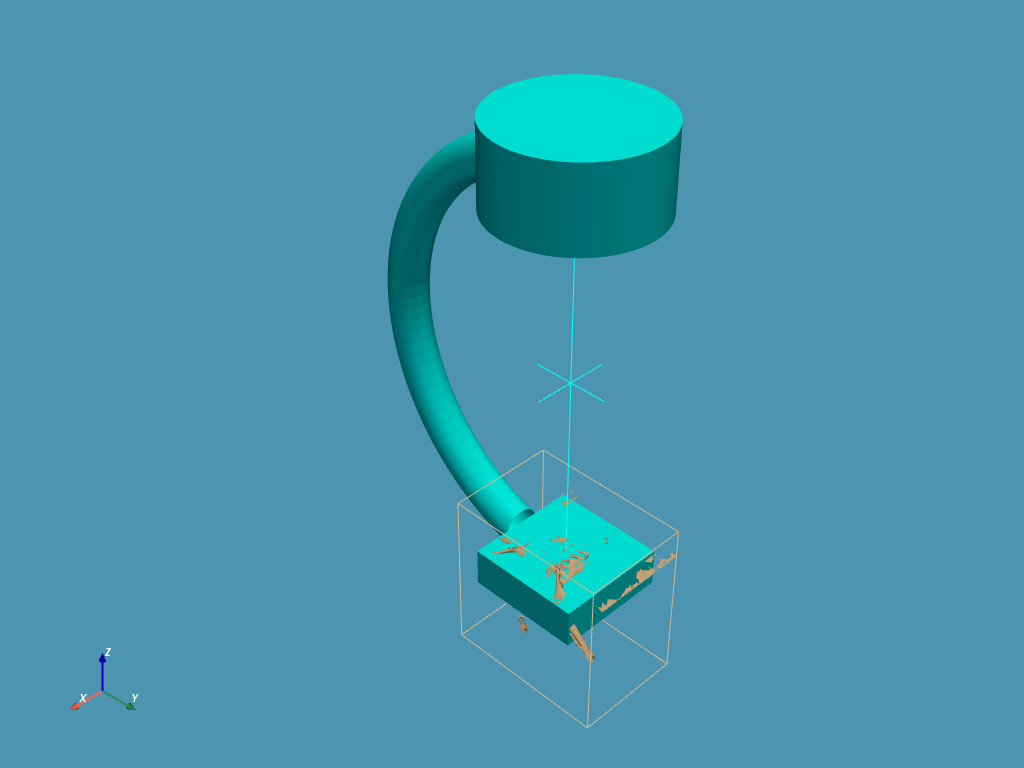

In [13]:
vol = Volume.from_nifti("../hi.nii.gz")
vol.facedown()
carm = MobileCArm()
carm.reposition(vol.center_in_world)
carm.move_to(alpha=0, beta=-180, degrees=True)
carm.move_by([0, 0, 600])
warnings.filterwarnings("ignore")
deepdrr.vis.show(vol, carm, full=[True, True]);
# with Projector(vol, carm=carm) as projector:
#     img = projector()
# plot_grid([crop(remove_border(min_max_normalize(img), tol=180), size=256)])

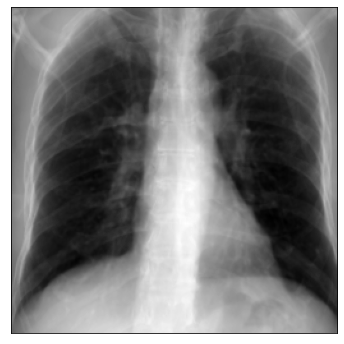

In [15]:
plot_grid([crop(remove_border(min_max_normalize(img), tol=180), size=256)])

In [9]:
vol.origin_in_world

Point3D(  [   9.45  179.3  -191.3     1.  ])

In [16]:
import nibabel
nibabel.load("../hi.nii.gz").affine

array([[  -1.        ,    0.        ,    0.        ,  157.59999084],
       [   0.        ,   -1.        ,    0.        ,  217.5       ],
       [   0.        ,    0.        ,    1.        , -613.90002441],
       [   0.        ,    0.        ,    0.        ,    1.        ]])